In [2]:
import tushare as ts
import pandas as pd
from datetime import datetime 
pro = ts.pro_api()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

balance_kv={
    "accounts_receiv":"应收账款",
    "notes_receiv":"应收票据",
    "oth_receiv":"其他应收款",
    "prepayment":"预付款项",
    
    "acct_payable":"应付账款",   
    "notes_payable":"应付票据",
    "adv_receipts":"预收款项",
    "oth_payable":"其他应付款"
}

def getbalance_yearly(ts_code='002624.sz',priod=5):
    df_all=pd.DataFrame()
    for i in range(0,priod+1):
        year=datetime.now().year-i
        key='Y'+str(year)
        df = pro.balancesheet(ts_code='002624.sz',fields=",".join(balance_kv.keys()),period=str(year)+'1231')
        
        if(df.empty):
            continue
            
        df = df.stack()
        df=pd.DataFrame(df[0])
        df['v']=df[0]
        df.columns=["key",key]
        df['key']=df.index
        df['key']=df.apply(lambda x:balance_kv[x.key] if x.key in balance_kv else x.key ,axis = 1)
        df[key]=df.apply(lambda x:str(round(int(x[key])/100000000,2))+"亿" if isinstance(x[key],float) else x[key],axis = 1)
    
        if df_all.empty:
            df_all=df
        else:
            df_all['Y'+str(year)]=df['Y'+str(year)]
        
    return df_all

df=getbalance_yearly(ts_code='002624.sz',priod=6)

def markblod(x):
    blod_key=[]     
    return 'color : red;font-weight:700' if x in blod_key else ''

df=df.style.applymap(markblod).set_caption('<h3>完美世界(002624.sz)-资产负债表</h3>').hide()
df

key,Y2020,Y2019,Y2018,Y2017,Y2016
应收票据,1.12亿,0.85亿,0.0亿,0.67亿,nan
应收账款,12.99亿,22.7亿,19.64亿,15.94亿,19.32亿
其他应收款,0.72亿,1.76亿,1.14亿,1.57亿,0.88亿
预付款项,3.31亿,5.42亿,7.9亿,8.52亿,4.83亿
应付账款,7.33亿,4.86亿,3.93亿,4.89亿,7.27亿
预收款项,0.24亿,6.06亿,4.09亿,5.29亿,1.63亿
其他应付款,4.42亿,2.87亿,2.52亿,3.5亿,4.14亿


In [22]:
import pandas as pd
import tushare as ts
from xlib.mysql import mysql
from xlib.astock import AStock

def fcompute(ts_code,df_cal):
    df_price=AStock.getStockDailyPriceByCode(ts_code,db)
    df_price=pd.merge(df_cal,df_price,on=['trade_date'],how='outer', validate="one_to_many")
    df_balance=mysql.selectToDf("select ann_date as trade_date,accounts_receiv,notes_receiv,oth_receiv,prepayment,acct_payable,notes_payable,adv_receipts,oth_payable from astock_finance_balancesheet where ts_code='"+ts_code+"' and report_type=1 order by trade_date asc",db)
    df_indicator=mysql.selectToDf("select ann_date as trade_date, ar_turn from astock_finance_indicator where ts_code='"+ts_code+"'   order by trade_date asc",db)
    df_basic=mysql.selectToDf("select trade_date,total_mv from astock_price_daily_basic where ts_code='"+ts_code+"' order by trade_date asc",db)
    df=pd.merge(df_price, df_balance, how='left', on='trade_date', copy=True, indicator=False)
    df=pd.merge(df, df_indicator, how='left', on='trade_date', copy=True, indicator=False)
    df=pd.merge(df, df_basic, how='left', on='trade_date', copy=True, indicator=False)
    df=df.fillna(method='ffill')
    df['ts_code']=ts_code
    df=df[df.trade_date>'20150101']
    df=df[df.trade_date<'20220410']
    df=df.reset_index(drop=True)
    df['f1']=(df['accounts_receiv'].astype('float'))/df['total_mv'].astype('float')
    df['f2']=(df['notes_receiv'].astype('float'))/df['total_mv'].astype('float')
    df['f3']=(df['oth_receiv'].astype('float'))/df['total_mv'].astype('float')
    df['f4']=(df['prepayment'].astype('float'))/df['total_mv'].astype('float')
    df['f5']=(df['acct_payable'].astype('float'))/df['total_mv'].astype('float')
    df['f6']=(df['notes_payable'].astype('float'))/df['total_mv'].astype('float')
    df['f7']=(df['adv_receipts'].astype('float'))/df['total_mv'].astype('float')
    df['f8']=(df['oth_payable'].astype('float'))/df['total_mv'].astype('float')
    df['f9']=(df['ar_turn'].astype('float'))/df['total_mv'].astype('float')
    df.rename(columns={'ts_code':'symbol','trade_date':'date'}, inplace = True)
    df['date']=df['date'].map(lambda x: x[:4]+'-'+x[4:6]+'-'+x[6:8])
    return df


db="tushare"
df_cal=mysql.selectToDf("select cal_date as trade_date from astock_trade_cal where is_open=1",db)


pro = ts.pro_api()
df_code = pro.index_weight(index_code='000300.SH', start_date='20150101', end_date='20220410')
df_code.drop_duplicates(subset=['con_code'],keep='first',inplace=True)
 
df_all=[]
df_code=df_code['con_code'].to_list()

for ts_code in df_code:
    df=fcompute(ts_code,df_cal)
    df_all.append(df)
    print(ts_code)
df_all=pd.concat(df_all)
df_all.to_csv("./xlib/cache/fin.csv")

603195.SH
003816.SZ
300782.SZ
601138.SH
600989.SH
601698.SH
300750.SZ
601916.SH
002938.SZ
601319.SH
603259.SH
601236.SH
300896.SZ
601865.SH
601066.SH
300759.SZ
300760.SZ
688111.SH
601990.SH
603486.SH
002916.SZ
603392.SH
600025.SH
603659.SH
603087.SH
300677.SZ
603882.SH
603260.SH
001979.SZ
300676.SZ
603233.SH
601155.SH
300628.SZ
601108.SH
300498.SZ
300595.SZ
300601.SZ
603501.SH
002841.SZ
603833.SH
603517.SH
601881.SH
300408.SZ
300413.SZ
300558.SZ
300450.SZ
603019.SH
603658.SH
002812.SZ
603939.SH
603338.SH
601966.SH
603799.SH
300433.SZ
002821.SZ
603160.SH
603986.SH
601985.SH
300529.SZ
002791.SZ
601021.SH
603369.SH
603899.SH
000333.SZ
601808.SH
601939.SH
002179.SZ
601169.SH
603806.SH
002714.SZ
002709.SZ
601238.SH
603288.SH
603993.SH
300347.SZ
300316.SZ
601231.SH
601360.SH
002157.SZ
601800.SH
601225.SH
601100.SH
300274.SZ
601669.SH
002624.SZ
002602.SZ
002607.SZ
002600.SZ
002601.SZ
002594.SZ
002568.SZ
601216.SH
002555.SZ
601799.SH
601933.SH
601211.SH
002736.SZ
000166.SZ
300144.SZ
600919.SH


Starting training...
[1]	valid_0's l2: 0.128021
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l2: 0.0911387
[3]	valid_0's l2: 0.0676151
[4]	valid_0's l2: 0.0521346
[5]	valid_0's l2: 0.0422142
[6]	valid_0's l2: 0.0357317
[7]	valid_0's l2: 0.0314778
[8]	valid_0's l2: 0.0286783
[9]	valid_0's l2: 0.0267124
[10]	valid_0's l2: 0.0254904
[11]	valid_0's l2: 0.0247484
[12]	valid_0's l2: 0.0242365
[13]	valid_0's l2: 0.0238241
[14]	valid_0's l2: 0.0236034
[15]	valid_0's l2: 0.0234904
[16]	valid_0's l2: 0.0234251
[17]	valid_0's l2: 0.0233176
[18]	valid_0's l2: 0.0232362
[19]	valid_0's l2: 0.0232263
[20]	valid_0's l2: 0.0232084
[21]	valid_0's l2: 0.0232096
[22]	valid_0's l2: 0.0232351
[23]	valid_0's l2: 0.0232002
[24]	valid_0's l2: 0.0231999
[25]	valid_0's l2: 0.0231866
[26]	valid_0's l2: 0.0231543
[27]	valid_0's l2: 0.0231668
[28]	valid_0's l2: 0.0231949
[29]	valid_0's l2: 0.0231832
[30]	valid_0's l2: 0.0231926
[31]	valid_0's l2: 0.0232159
Early stopping, best iteration

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2018-01-02  2018-01-02
End Period                 2022-04-08  2022-04-08
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          509.64%     -2.82%
CAGR﹪                     52.77%      -0.67%

Sharpe                     1.64        0.07
Smart Sharpe               1.54        0.07
Sortino                    2.54        0.11
Smart Sortino              2.4         0.1
Sortino/√2                 1.8         0.07
Smart Sortino/√2           1.7         0.07
Omega                      1.34        1.34

Max Drawdown               -27.74%     -48.95%
Longest DD Days            437         1190
Volatility (ann.)          29.62%      20.98%
R^2                        0.33        0.33
Calmar                     1.9         -0.01
Skew                       0.05        0.51
Kurtosis                   3.01        

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-01-26,2022-03-15,2022-04-08,437,-27.736935,-23.889957
2,2018-04-23,2018-10-18,2019-02-20,303,-22.401941,-18.688194
3,2019-12-13,2020-02-03,2020-02-17,66,-20.203828,-15.203960
4,2019-04-18,2019-05-06,2019-09-09,144,-18.330989,-16.387677
5,2021-01-13,2021-01-15,2021-01-20,7,-14.265701,-8.396246


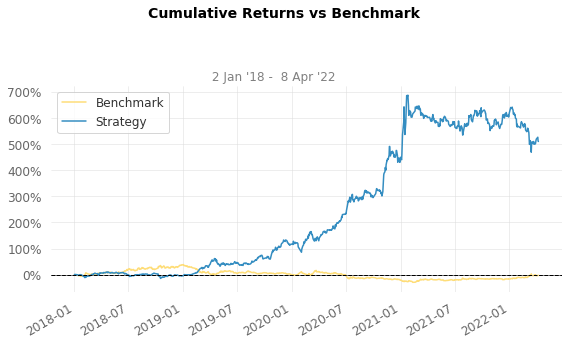

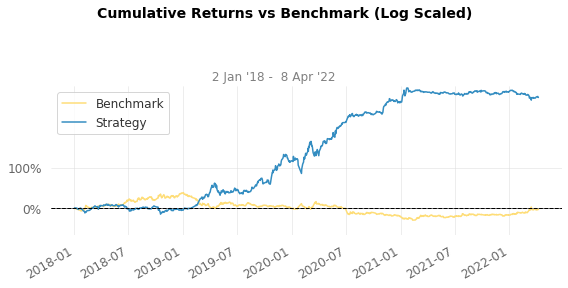

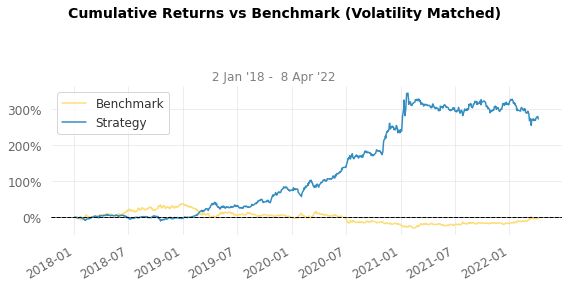

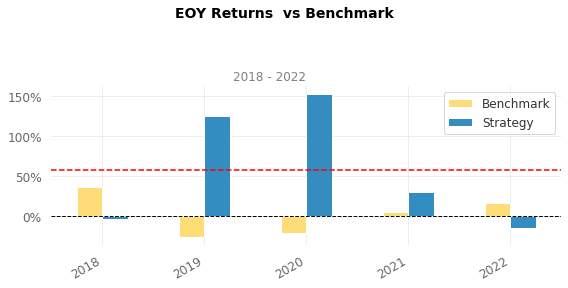

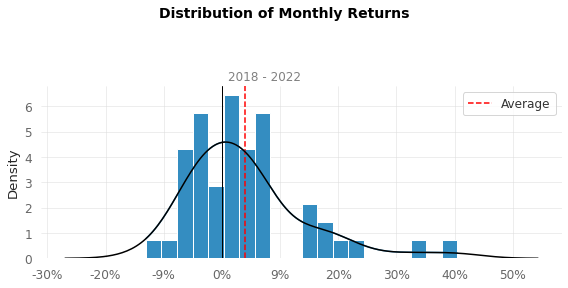

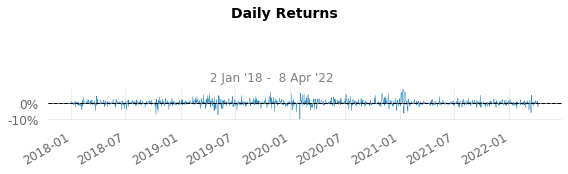

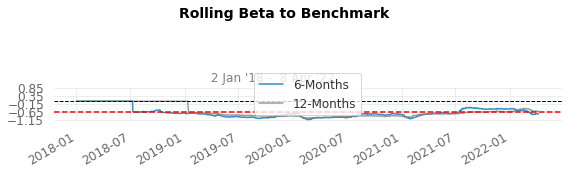

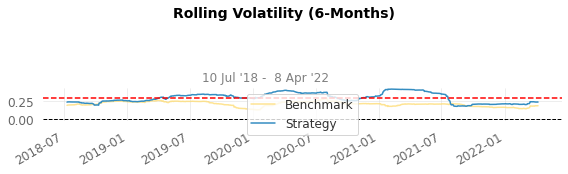

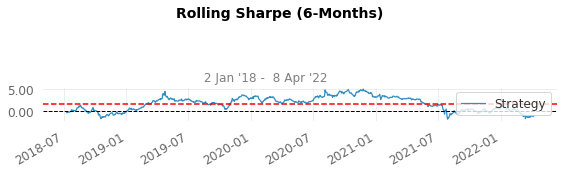

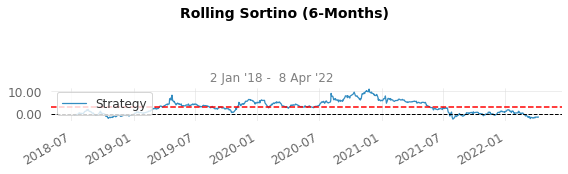

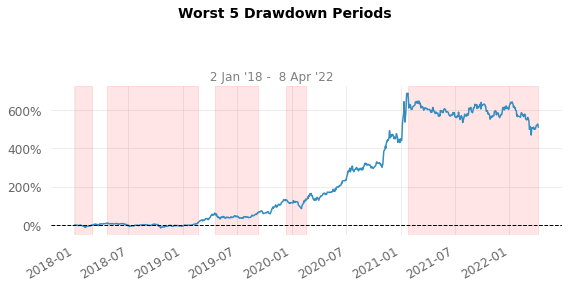

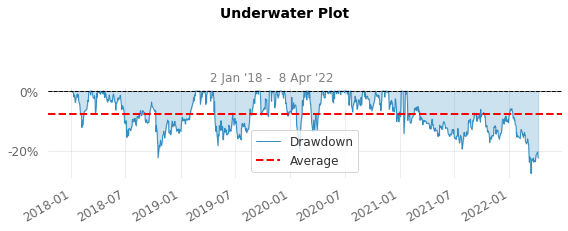

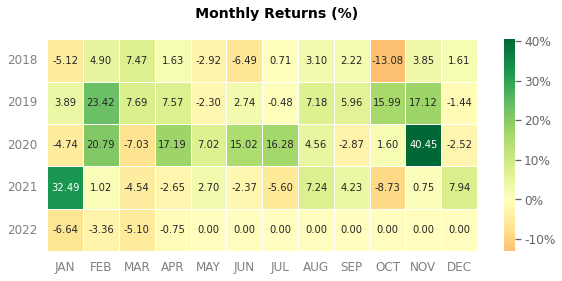

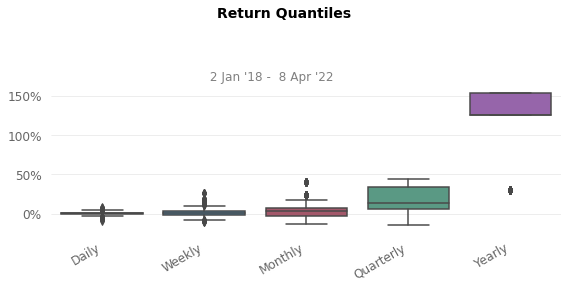

In [23]:
import pandas as pd
from xlib import data
import akshare as ak

idx_data = ak.index_zh_a_hist(symbol='000300', period="daily", start_date='20180101', end_date='20220410')    
idx_data.rename(columns={'日期':'date', '开盘':'open', '收盘':'close', 
                           '最高':'high', '最低':'low', '成交量':'volume',
                           '成交额':'amount', '振幅':'swing', '涨跌幅':'chg_pct',
                           '涨跌额':'chg_amount', '换手率':'turnover',
                          }, inplace = True)
idx_data['date'] = pd.to_datetime(idx_data['date'], format='%Y-%m-%d')
bench=idx_data.set_index('date')


df=pd.DataFrame()
df=pd.read_csv('./xlib/cache/fin.csv',index_col=0)
df=df.reset_index(drop=True)
df['label']=df['close'].shift(-30)/df['close']
from xlib import model
df_train,df_valid,df_pred=model.datasplit(df,train_end='2017-01-01',valid_end='2018-01-01')
model.lgbtrain(df_train,df_valid,label='label')  
preds=model.lgbpred(df_pred,label='label') 

from xlib.strategies import Top10Strategy
from xlib import backtest
preds['score']=preds.apply(lambda x: -9 if x['high']==x['low'] else x['pred'] ,axis=1)
preds['rank']=preds.groupby('date')['score'].rank(method='max',ascending=False)
preds['signal']=preds.apply(lambda x: 1 if x['rank']<=10 else 0 ,axis=1)


returns=backtest.test(preds,Top10Strategy,hold_day=30)
backtest.analysis(returns,bench)